In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/TCEHY.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,46.380001,47.700001,46.259998,47.419998,44.560394,9271000
1,2020-01-28,47.549999,48.480000,47.400002,48.220001,45.312157,7210600
2,2020-01-29,49.520000,49.560001,49.029999,49.529999,46.543156,6089200
3,2020-01-30,48.110001,49.209999,48.080002,49.080002,46.120296,5431100
4,2020-01-31,47.930000,47.980000,47.529999,47.910000,45.020847,5588800


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
725,2022-12-09,41.230000,41.360001,40.650002,40.720001,38.652031,2504100
726,2022-12-12,40.790001,40.849998,39.950001,40.450001,38.395744,2896200
727,2022-12-13,41.750000,42.240002,40.810001,41.049999,38.965271,3218200
728,2022-12-14,41.590000,41.939999,41.259998,41.750000,39.629723,2049700
729,2022-12-15,41.700001,42.110001,40.119999,40.410000,38.357773,3313100


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,59.614548,60.264795,58.912808,59.634356,56.281708,4.238698e+06
std,15.563843,15.638283,15.388394,15.561810,14.606218,2.701164e+06
min,25.719999,25.879999,24.750000,25.680000,24.375839,8.893000e+05
25%,47.710001,48.325001,46.990000,47.662500,44.928152,2.518000e+06
50%,59.360001,60.000000,58.665001,59.270000,55.994894,3.545800e+06
75%,72.302498,72.727502,71.305000,71.802502,67.720211,5.209625e+06
max,99.010002,99.400002,98.430000,99.099998,93.374161,2.605420e+07


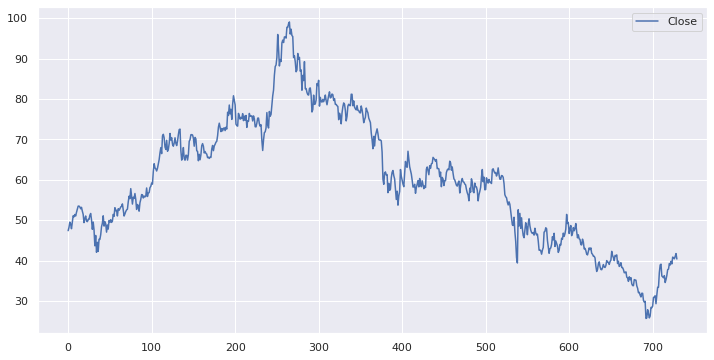

In [6]:
df[['Close']].plot(figsize=(12,6));


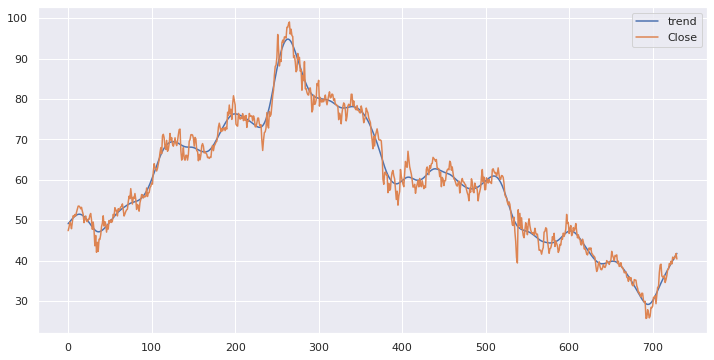

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-0.9610485894649947,
 0.7672046112219768,
 3,
 726,
 {'1%': -3.4393893552577723,
  '5%': -2.8655292671104644,
  '10%': -2.5688943376666744},
 2805.0508077984514)

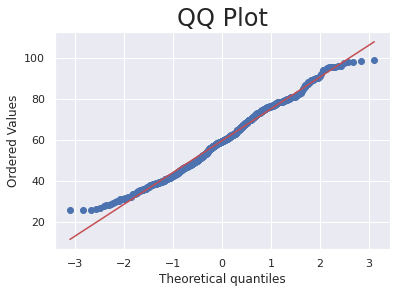

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


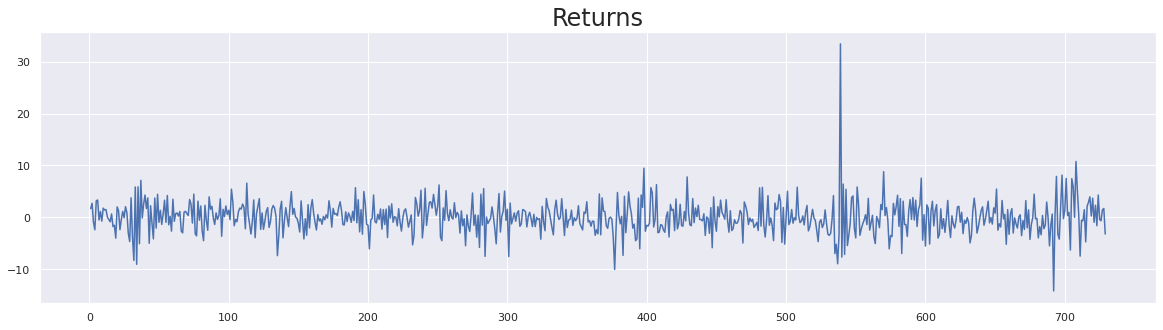

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


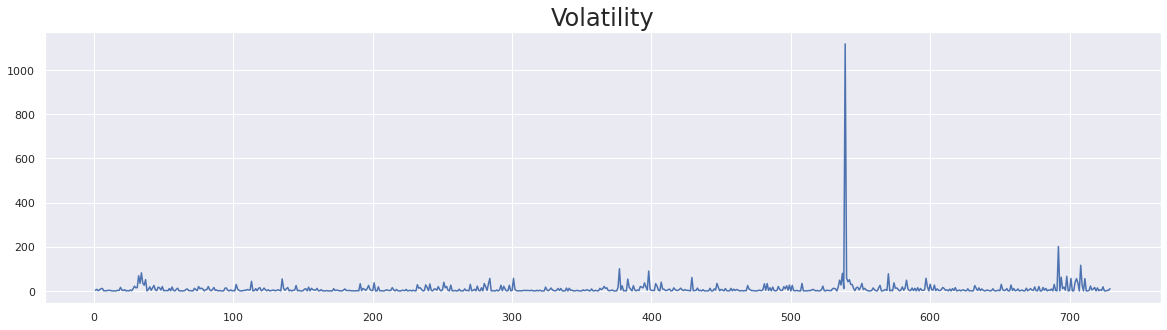

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

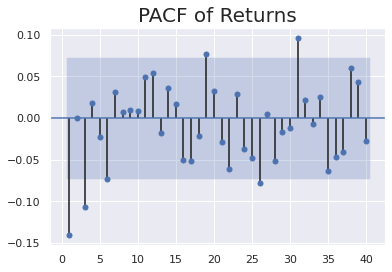

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

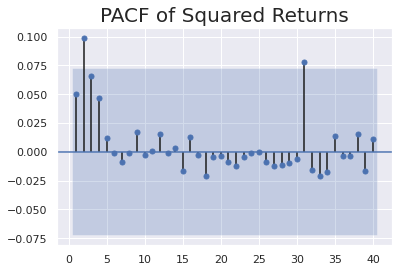

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 40.4 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2584.5030343892086
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1907.3565426786356
Iteration:      3,   Func. Count:     17,   Neg. LLF: 1867.5441220253356
Iteration:      4,   Func. Count:     22,   Neg. LLF: 1867.4656551334879
Iteration:      5,   Func. Count:     26,   Neg. LLF: 1867.4656519297696
Iteration:      6,   Func. Count:     29,   Neg. LLF: 1867.465651929765
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1867.4656519297696
            Iterations: 6
            Function evaluations: 29
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1867.47
Distribution:                  Normal   AIC:                           3740.93
Method:            Maximum Likelihood   BIC:                           3754.71
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1131      0.181      0.626      0.531 [ -0.241,  0.467]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          8.3931      0.931      9.017  1.933e-19 [  6.569, 10.217]
alpha[1]       0.1964      0.188      1.043      0.297 [ -0.173,  0.566]
========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     31,   Neg. LLF: 1875.4913024246687
Iteration:     10,   Func. Count:     59,   Neg. LLF: 1825.376504270787
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1825.3666292219173
            Iterations: 14
            Function evaluations: 78
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1825.37
Distribution:                  Normal   AIC:                           3658.73
Method:            Maximum Likelihood   BIC:                           3677.10
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0112      0.101      0.110      0.912 [ -0.188,  0.210]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          6.4324      0.702      9.165  4.947e-20      [  5.057,  7.808]
alpha[1]       0.0379  2.993e-02      1.267      0.205 [-2.073e-02,9.658e-02]
alpha[2]       0.3036      0.136      2.237  2.526e-02    [3.765e-02,  0.570]
=============================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1817.6741779656813
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1810.494927197346
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1810.494927197346
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1810.49
Distribution:                  Normal   AIC:                           3630.99
Method:            Maximum Likelihood   BIC:                           3653.95
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0679      0.101      0.674      0.501 [ -0.130,  0.265]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          4.9202      0.623      7.897  2.864e-15    [  3.699,  6.141]
alpha[1]       0.0485  4.589e-02      1.056      0.291 [-4.147e-02,  0.138]
alpha[2]       0.1788      0.133      1.341      0.180 [-8.246e-02,  0.440]
alpha[3]       0.2837      0.104      2.721  6.517e-03  [7.931e-02,  0.488]
===========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     86,   Neg. LLF: 1869.8730999578754
Iteration:     10,   Func. Count:    172,   Neg. LLF: 1921.9947895697287
Iteration:     15,   Func. Count:    258,   Neg. LLF: 1803.7848527210253
Iteration:     20,   Func. Count:    345,   Neg. LLF: 1804.489383108452
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1803.0792394369091
            Iterations: 24
            Function evaluations: 410
            Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1803.08
Distribution:                  Normal   AIC:                           3636.16
Method:            Maximum Likelihood   BIC:                           3705.03
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0632      0.218      0.290      0.772 [ -0.364,  0.490]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          3.6832      1.508      2.442  1.460e-02      [  0.727,  6.639]
alpha[1]       0.0337      0.134      0.251      0.802      [ -0.230,  0.297]
alpha[2]       0.1722      0.120      1.433      0.152   [-6.329e-02,  0.408]
alpha[3]       0.2245      0.124      1.810  7.023e-02   [-1.855e-02,  0.468]
alpha[4]       0.0772      0.119      0.652      0.515      [ -0.155,  0.310]
alpha[5]   1.2386e-12  5.043e-02  2.456e-11      1.000 [-9.884e-02,9.884e-02]
alpha[6]       0.0537      0.115      0.467      0.641      [ -0.172,  0.280]
alpha[7]   4.6722e-12      0.690  6.767e-12      1.000      [ -1.353,  1.353]
alpha[8]   1.9520e-12  8.541e-02  2.285e-11      1.000      [ -0.167,  0.167]
alpha[9]       0.0655      0.122      0.539      0.590      [ -0.173,  0.304]
alpha[10]  1.3713e-12      0.197  6.959e-12      1.000      [ -0.386,  0.386]
alpha[11]  4.3525e-04  1.770e-02  2.459e-02      0.980 [-3.426e-02,3.513e-02]
alpha[12]  2.8471e-03  9.718e-03      0.293      0.770 [-1.620e-02,2.189e-02]
alpha[13]      0.0132      0.219  6.029e-02      0.952      [ -0.416,  0.443]
=============================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1857.8919013575692
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1817.4129506148206
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1817.41
Distribution:                  Normal   AIC:                           3642.83
Method:            Maximum Likelihood   BIC:                           3661.19
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0532      0.106      0.501      0.616 [ -0.155,  0.261]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.0345      0.260      3.982  6.834e-05   [  0.525,  1.544]
alpha[1]       0.1810  7.357e-02      2.460  1.388e-02 [3.681e-02,  0.325]
beta[1]        0.7244  4.317e-02     16.779  3.496e-63   [  0.640,  0.809]
==========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1819.490583851906
Iteration:     10,   Func. Count:     68,   Neg. LLF: 1817.4129523063893
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1817.412950617098
            Iterations: 12
            Function evaluations: 79
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1817.41
Distribution:                  Normal   AIC:                           3644.83
Method:            Maximum Likelihood   BIC:                           3667.78
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0532      0.798  6.675e-02      0.947 [ -1.510,  1.617]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.0345      5.144      0.201      0.841 [ -9.048, 11.117]
alpha[1]       0.1810      1.686      0.107      0.914 [ -3.123,  3.485]
beta[1]        0.7244     17.416  4.159e-02      0.967 [-33.410, 34.859]
beta[2]    1.3696e-10     15.460  8.859e-12      1.000 [-30.302, 30.302]
========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1935.3970007348466
Iteration:     10,   Func. Count:     79,   Neg. LLF: 1817.4167481054267
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1817.412950519081
            Iterations: 13
            Function evaluations: 100
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1817.41
Distribution:                  Normal   AIC:                           3646.83
Method:            Maximum Likelihood   BIC:                           3674.38
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:07   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0532      0.131      0.406      0.685 [ -0.204,  0.310]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.0345      0.446      2.319  2.040e-02 [  0.160,  1.909]
alpha[1]       0.1810      0.165      1.095      0.273 [ -0.143,  0.505]
beta[1]        0.7244      1.071      0.677      0.499 [ -1.374,  2.823]
beta[2]        0.0000      1.467      0.000      1.000 [ -2.874,  2.874]
beta[3]        0.0000      0.569      0.000      1.000 [ -1.116,  1.116]
========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1810.7726791239488
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1809.6269024283833
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1809.6268451478254
            Iterations: 12
            Function evaluations: 84
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1809.63
Distribution:                  Normal   AIC:                           3629.25
Method:            Maximum Likelihood   BIC:                           3652.21
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:07   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         7.2609e-03  9.866e-02  7.360e-02      0.941 [ -0.186,  0.201]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.7983      0.583      3.087  2.021e-03      [  0.657,  2.940]
alpha[1]       0.0266  3.609e-02      0.738      0.460 [-4.409e-02,9.736e-02]
alpha[2]       0.2128      0.108      1.969  4.895e-02    [9.788e-04,  0.425]
beta[1]        0.5804      0.110      5.299  1.167e-07      [  0.366,  0.795]
=============================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 1839.2951555950133
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1806.760615376567
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1806.7544066911903
            Iterations: 14
            Function evaluations: 110
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1806.75
Distribution:                  Normal   AIC:                           3625.51
Method:            Maximum Likelihood   BIC:                           3653.06
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:07   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0459      0.102      0.450      0.653 [ -0.154,  0.246]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          3.0370      0.921      3.296  9.804e-04    [  1.231,  4.843]
alpha[1]       0.0393  4.676e-02      0.841      0.400 [-5.231e-02,  0.131]
alpha[2]       0.1337      0.117      1.144      0.253 [-9.546e-02,  0.363]
alpha[3]       0.2313      0.129      1.800  7.193e-02 [-2.061e-02,  0.483]
beta[1]        0.2968      0.154      1.932  5.341e-02 [-4.355e-03,  0.598]
===========================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 2887.6469819858958
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1806.948630244587
Iteration:     15,   Func. Count:    106,   Neg. LLF: 1806.9485214601043
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1806.94852025094
            Iterations: 16
            Function evaluations: 117
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1806.95
Distribution:                  Normal   AIC:                           3623.90
Method:            Maximum Likelihood   BIC:                           3646.86
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:07   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1176  2.790e-03    -42.159      0.000 [ -0.123, -0.112]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1356  4.199e-02      3.228  1.245e-03  [5.326e-02,  0.218]
alpha[1]       0.2119  5.682e-02      3.730  1.918e-04    [  0.101,  0.323]
gamma[1]      -0.1307  4.183e-02     -3.125  1.776e-03 [ -0.213,-4.874e-02]
beta[1]        0.9422  1.977e-02     47.646      0.000    [  0.903,  0.981]
===========================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1804.82
Distribution:                  Normal   AIC:                           3619.64
Method:            Maximum Likelihood   BIC:                           3642.59
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:07   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0980      0.104     -0.943      0.346 [ -0.302,  0.106]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.6540      0.254      2.576  9.996e-03      [  0.156,  1.152]
alpha[1]       0.0188  2.234e-02      0.841      0.400 [-2.499e-02,6.259e-02]
gamma[1]       0.2176  9.522e-02      2.285  2.228e-02    [3.099e-02,  0.404]
beta[1]        0.8175  5.524e-02     14.801  1.452e-49      [  0.709,  0.926]
=============================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1808.006695695471
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1806.2474759290185
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1806.246124380349
            Iterations: 14
            Function evaluations: 100
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1806.25
Distribution:                  Normal   AIC:                           3622.49
Method:            Maximum Likelihood   BIC:                           3645.45
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:07   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.1227      0.105     -1.168      0.243 [ -0.329,8.323e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1678  6.297e-02      2.665  7.709e-03    [4.437e-02,  0.291]
alpha[1]       0.0371  2.837e-02      1.307      0.191 [-1.853e-02,9.267e-02]
gamma[1]       0.1493  5.305e-02      2.814  4.888e-03    [4.533e-02,  0.253]
beta[1]        0.8629  3.739e-02     23.081 7.258e-118      [  0.790,  0.936]
=============================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1817.8153882341749
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1816.4779574539207
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1816.4779574539207
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1816.48
Distribution:                  Normal   AIC:                           3642.96
Method:            Maximum Likelihood   BIC:                           3665.91
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0499  9.833e-02      0.508      0.612 [ -0.143,  0.243]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8891      0.385      2.311  2.083e-02    [  0.135,  1.643]
phi        4.3136e-13      0.274  1.577e-12      1.000    [ -0.536,  0.536]
d              0.4886      0.283      1.728  8.405e-02 [-6.570e-02,  1.043]
beta           0.3852  9.067e-02      4.249  2.150e-05    [  0.208,  0.563]
===========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 1960.3203999018338
Iteration:     10,   Func. Count:     54,   Neg. LLF: 1867.523814556484
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1867.4656519328214
            Iterations: 14
            Function evaluations: 69
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1867.47
Distribution:                  Normal   AIC:                           3740.93
Method:            Maximum Likelihood   BIC:                           3754.71
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1131      0.181      0.626      0.531 [ -0.241,  0.467]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          8.3931      0.931      9.017  1.933e-19 [  6.569, 10.217]
alpha[1]       0.1964      0.188      1.043      0.297 [ -0.173,  0.566]
========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 329041220.99287903
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1804.812867160789
Iteration:     15,   Func. Count:    121,   Neg. LLF: 1804.786059495235
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1804.7855676240233
            Iterations: 19
            Function evaluations: 148
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1804.79
Distribution:                  Normal   AIC:                           3621.57
Method:            Maximum Likelihood   BIC:                           3649.12
                                        No. Observations:                  729
Date:                Thu, Jan 26 2023   Df Residuals:                      728
Time:                        01:51:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0989      0.104     -0.949      0.343 [ -0.303,  0.105]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5873      0.843      0.696      0.486    [ -1.066,  2.240]
alpha[1]       0.0990  5.388e-02      1.838  6.604e-02 [-6.562e-03,  0.205]
gamma[1]       0.5683      0.220      2.586  9.696e-03    [  0.138,  0.999]
beta[1]        0.8216  7.278e-02     11.289  1.486e-29    [  0.679,  0.964]
delta          1.9202      0.992      1.935  5.299e-02 [-2.474e-02,  3.865]
===========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=13.219536611643935, pvalue=0.0013471442387330557)

In [46]:
jarque_bera_test.statistic

13.219536611643935

In [47]:
jarque_bera_test.pvalue

0.0013471442387330557

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1      1.687058
2      2.716711
3     -0.908534
4     -2.383867
5      3.193486
         ...   
725   -0.391389
726   -0.663065
727    1.483308
728    1.705240
729   -3.209581
Name: returns, Length: 729, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=9088.745053674562, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

9088.745053674562

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

17.16224440142826

coef. asimetria

In [53]:
returns.skew()

1.5009421242707237

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -31.440
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                -12.124
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -18.032
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.249
P-value                         0.190
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        730 non-null    object 
 1   Open        730 non-null    float64
 2   High        730 non-null    float64
 3   Low         730 non-null    float64
 4   Close       730 non-null    float64
 5   Adj Close   730 non-null    float64
 6   Volume      730 non-null    int64  
 7   trend       730 non-null    float64
 8   returns     729 non-null    float64
 9   sq_returns  729 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 57.2+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/TCEHY.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,46.380001,47.700001,46.259998,47.419998,44.560394,9271000
1,2020-01-28,47.549999,48.480000,47.400002,48.220001,45.312157,7210600
2,2020-01-29,49.520000,49.560001,49.029999,49.529999,46.543156,6089200
3,2020-01-30,48.110001,49.209999,48.080002,49.080002,46.120296,5431100
4,2020-01-31,47.930000,47.980000,47.529999,47.910000,45.020847,5588800
...,...,...,...,...,...,...,...
725,2022-12-09,41.230000,41.360001,40.650002,40.720001,38.652031,2504100
726,2022-12-12,40.790001,40.849998,39.950001,40.450001,38.395744,2896200
727,2022-12-13,41.750000,42.240002,40.810001,41.049999,38.965271,3218200
728,2022-12-14,41.590000,41.939999,41.259998,41.750000,39.629723,2049700


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-01-27,47.419998,9271000
1,2020-01-28,48.220001,7210600
2,2020-01-29,49.529999,6089200
3,2020-01-30,49.080002,5431100
4,2020-01-31,47.910000,5588800
...,...,...,...
725,2022-12-09,40.720001,2504100
726,2022-12-12,40.450001,2896200
727,2022-12-13,41.049999,3218200
728,2022-12-14,41.750000,2049700


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,47.419998,9271000,48.220001
1,2020-01-28,48.220001,7210600,49.529999
2,2020-01-29,49.529999,6089200,49.080002
3,2020-01-30,49.080002,5431100,47.910000
4,2020-01-31,47.910000,5588800,49.439999
...,...,...,...,...
725,2022-12-09,40.720001,2504100,40.450001
726,2022-12-12,40.450001,2896200,41.049999
727,2022-12-13,41.049999,3218200,41.750000
728,2022-12-14,41.750000,2049700,40.410000


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,47.419998,9271000,48.220001
1,2020-01-28,48.220001,7210600,49.529999
2,2020-01-29,49.529999,6089200,49.080002
3,2020-01-30,49.080002,5431100,47.910000
4,2020-01-31,47.910000,5588800,49.439999
...,...,...,...,...
724,2022-12-08,40.880001,2587500,40.720001
725,2022-12-09,40.720001,2504100,40.450001
726,2022-12-12,40.450001,2896200,41.049999
727,2022-12-13,41.049999,3218200,41.750000


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.29610458, 0.33307106, 0.30700084],
       [0.30700084, 0.25119512, 0.32484336],
       [0.32484336, 0.20663305, 0.31871428],
       ...,
       [0.20117136, 0.07974997, 0.2093435 ],
       [0.2093435 , 0.09254557, 0.2188777 ],
       [0.2188777 , 0.04611185, 0.20062654]])

In [73]:
price_volume_target_scaled_df.shape

(729, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((729, 2), (729, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((473, 2), (473, 1))

In [78]:
X_test.shape, y_test.shape

((256, 2), (256, 1))

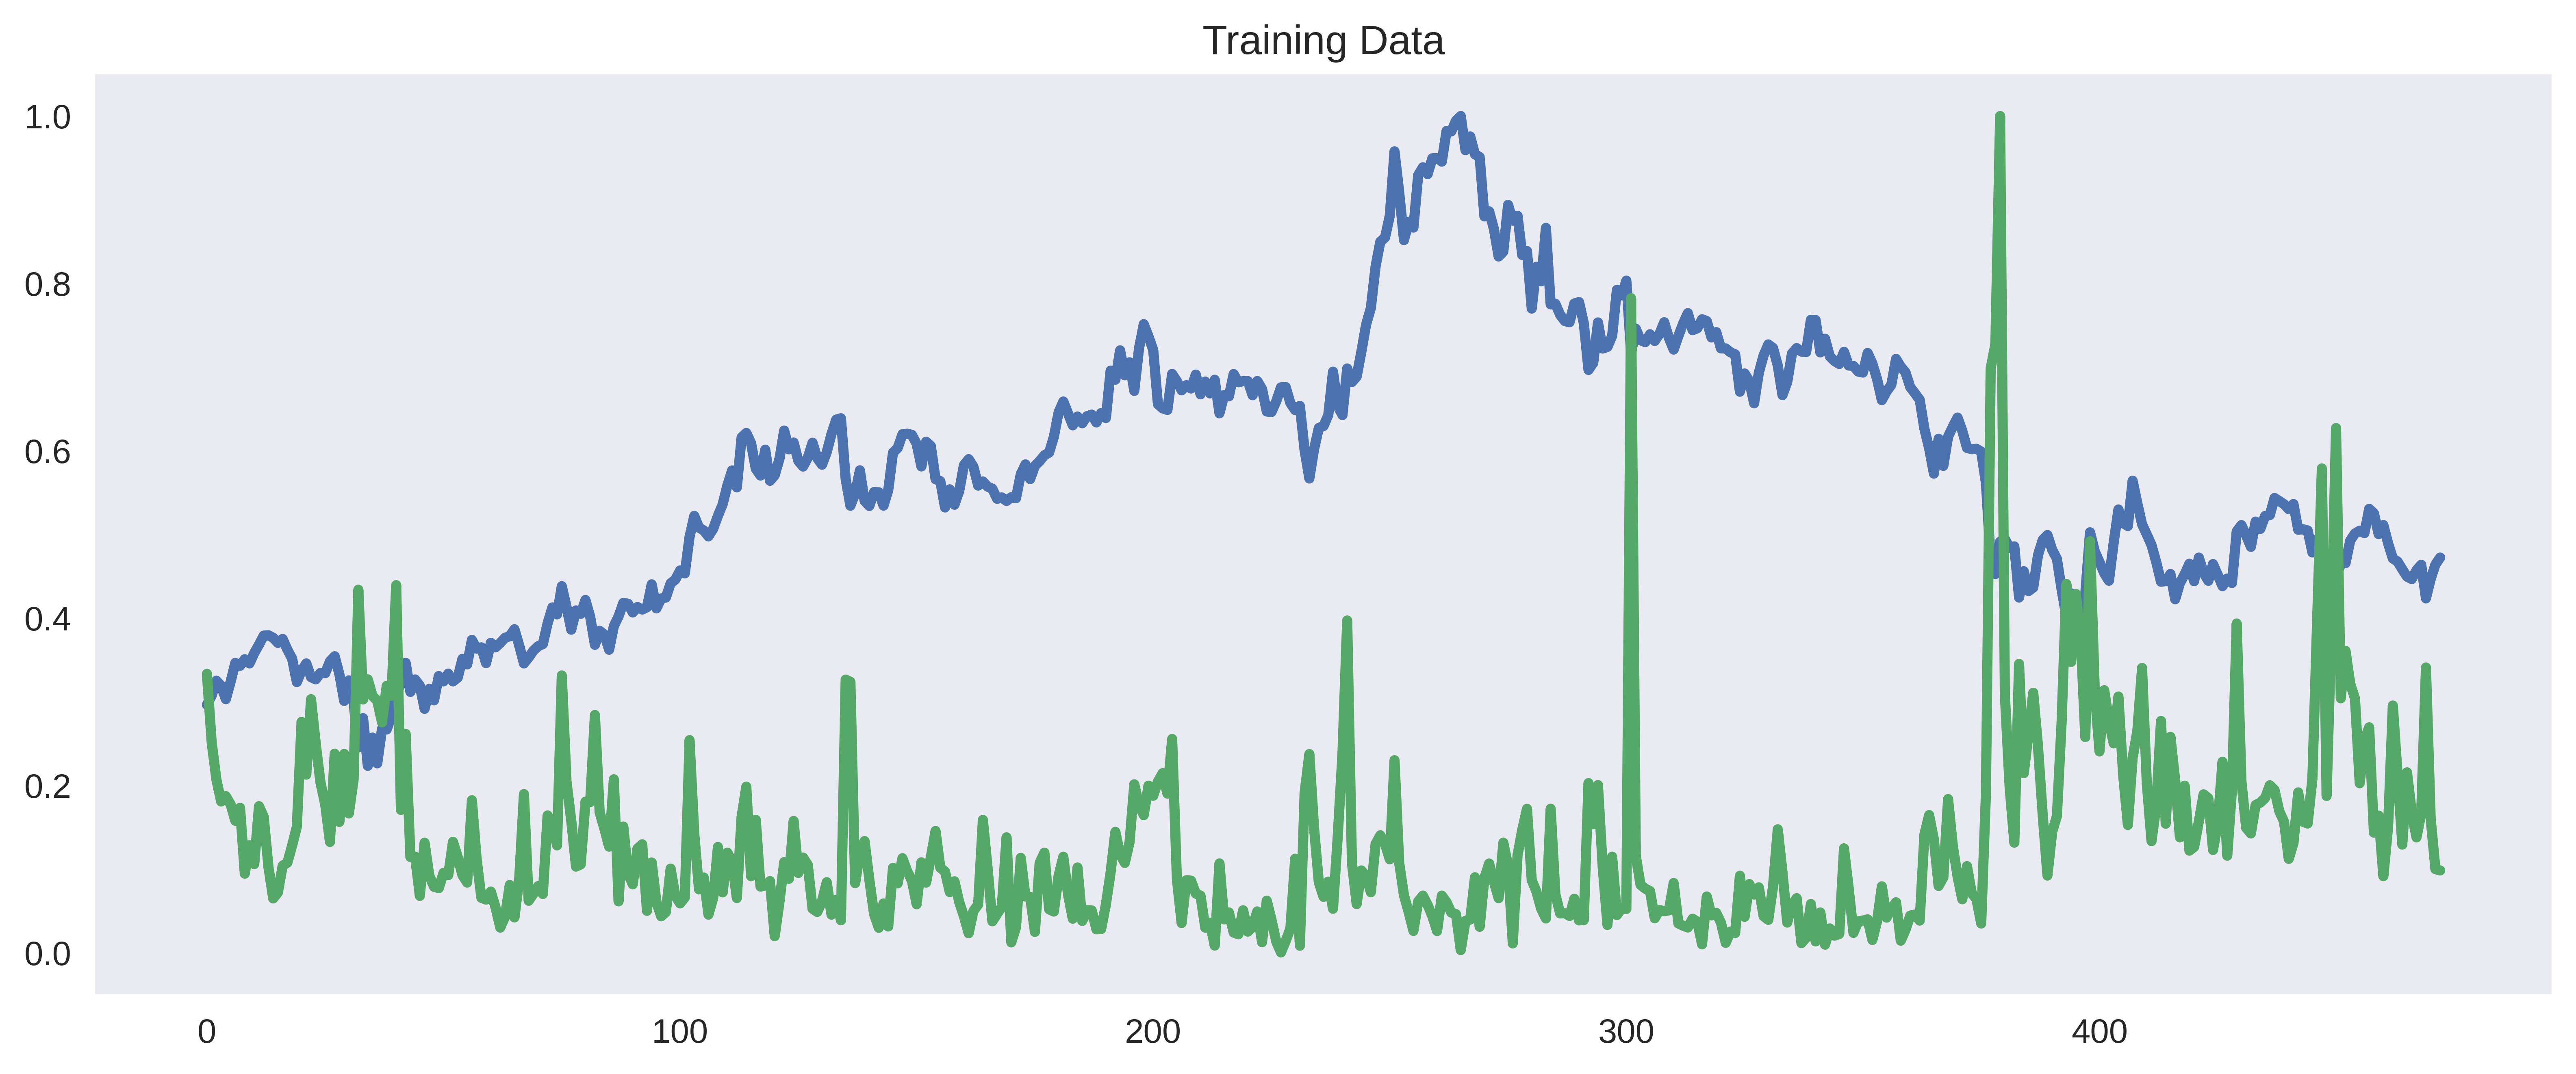

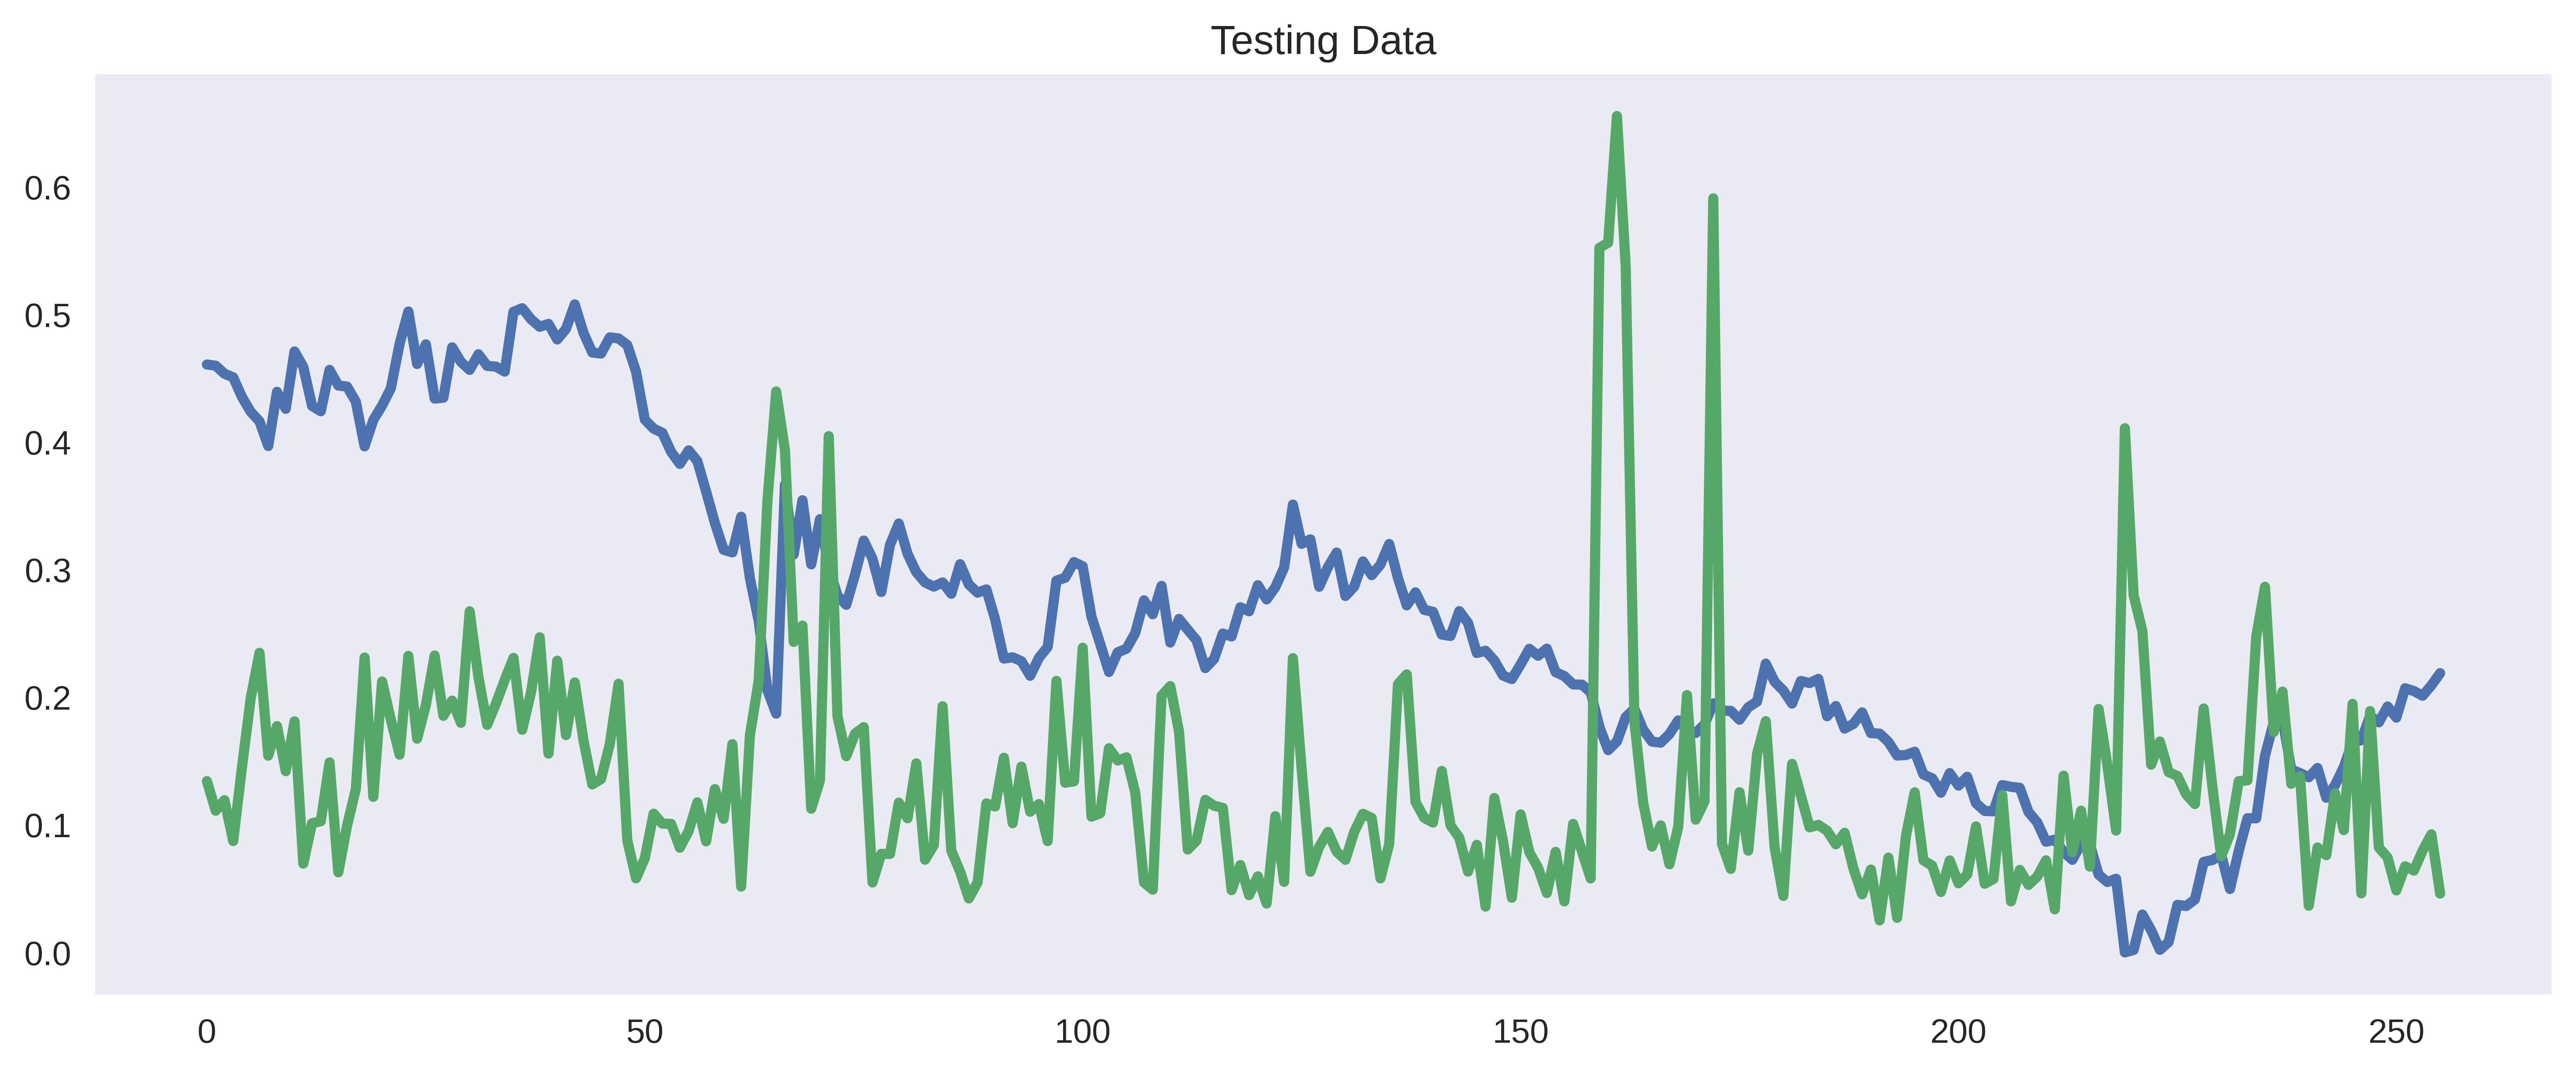

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9010352437750175


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.31533793],
       [0.32811194],
       [0.34585028],
       [0.34122944],
       [0.3265777 ],
       [0.34579192],
       [0.3669601 ],
       [0.3632038 ],
       [0.37315209],
       [0.36738222],
       [0.37940567],
       [0.38607345],
       [0.39626799],
       [0.39876706],
       [0.39739096],
       [0.39158893],
       [0.39476926],
       [0.38304688],
       [0.37257803],
       [0.34637347],
       [0.35425407],
       [0.36438387],
       [0.34625885],
       [0.34581419],
       [0.35448386],
       [0.35505295],
       [0.3694628 ],
       [0.3712674 ],
       [0.35455147],
       [0.32293131],
       [0.34765645],
       [0.32241313],
       [0.26564067],
       [0.30187377],
       [0.24947017],
       [0.28076169],
       [0.25309249],
       [0.29125588],
       [0.28908413],
       [0.3039334 ],
       [0.32390443],
       [0.34368429],
       [0.36327303],
       [0.33704847],
       [0.35048142],
       [0.34536258],
       [0.31807028],
       [0.341

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

729

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
724,2022-12-08
725,2022-12-09
726,2022-12-12
727,2022-12-13


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.296105
1,2020-01-28,0.307001
2,2020-01-29,0.324843
3,2020-01-30,0.318714
4,2020-01-31,0.302779
...,...,...
724,2022-12-08,0.207028
725,2022-12-09,0.204849
726,2022-12-12,0.201171
727,2022-12-13,0.209343


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.296105,0.315338
1,2020-01-28,0.307001,0.328112
2,2020-01-29,0.324843,0.345850
3,2020-01-30,0.318714,0.341229
4,2020-01-31,0.302779,0.326578
...,...,...,...
724,2022-12-08,0.207028,0.244115
725,2022-12-09,0.204849,0.242260
726,2022-12-12,0.201171,0.238377
727,2022-12-13,0.209343,0.245322


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-01-27,47.419998,9271000,48.220001
1,2020-01-28,48.220001,7210600,49.529999
2,2020-01-29,49.529999,6089200,49.080002
3,2020-01-30,49.080002,5431100,47.910000
4,2020-01-31,47.910000,5588800,49.439999
...,...,...,...,...
725,2022-12-09,40.720001,2504100,40.450001
726,2022-12-12,40.450001,2896200,41.049999
727,2022-12-13,41.049999,3218200,41.750000
728,2022-12-14,41.750000,2049700,40.410000


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,47.419998,9271000,48.220001
1,2020-01-28,48.220001,7210600,49.529999
2,2020-01-29,49.529999,6089200,49.080002
3,2020-01-30,49.080002,5431100,47.910000
4,2020-01-31,47.910000,5588800,49.439999
...,...,...,...,...
725,2022-12-09,40.720001,2504100,40.450001
726,2022-12-12,40.450001,2896200,41.049999
727,2022-12-13,41.049999,3218200,41.750000
728,2022-12-14,41.750000,2049700,40.410000


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[4.7419998e+01, 9.2710000e+06],
       [4.8220001e+01, 7.2106000e+06],
       [4.9529999e+01, 6.0892000e+06],
       ...,
       [4.1049999e+01, 3.2182000e+06],
       [4.1750000e+01, 2.0497000e+06],
       [4.0410000e+01, 3.3131000e+06]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.29610458]),
 array([0.30700084]),
 array([0.32484336]),
 array([0.31871428]),
 array([0.30277854]),
 array([0.32361754]),
 array([0.34622717]),
 array([0.34268593]),
 array([0.35058565]),
 array([0.34554617]),
 array([0.35794061]),
 array([0.36801964]),
 array([0.37877966]),
 array([0.37918824]),
 array([0.37619177]),
 array([0.37006264]),
 array([0.37482977]),
 array([0.36202668]),
 array([0.35126671]),
 array([0.32320894]),
 array([0.33682921]),
 array([0.34554617]),
 array([0.32906566]),
 array([0.32647784]),
 array([0.33424137]),
 array([0.33383274]),
 array([0.34799783]),
 array([0.35412695]),
 array([0.33247073]),
 array([0.30073548]),
 array([0.325252]),
 array([0.29896488]),
 array([0.24516481]),
 array([0.28003272]),
 array([0.22309999]),
 array([0.25687826]),
 array([0.22609642]),
 array([0.26722963]),
 array([0.26654863]),
 array([0.28248432]),
 array([0.30972485]),
 array([0.3210297]),
 array([0.34622717]),
 array([0.3114955]),
 array([0.32634159]),
 array([0.3188

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((510, 1, 1), (219, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 9s 132ms/step - loss: 0.3178 - val_loss: 0.1161
Epoch 2/20
13/13 [==============================] - 0s 13ms/step - loss: 0.1135 - val_loss: 0.0115
Epoch 3/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0250 - val_loss: 0.0047
Epoch 4/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0153 - val_loss: 0.0038
Epoch 5/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0130 - val_loss: 0.0080
Epoch 6/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0106 - val_loss: 0.0046
Epoch 7/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0096 - val_loss: 0.0040
Epoch 8/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0082 - val_loss: 0.0051
Epoch 9/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0070 - val_loss: 0.0022
Epoch 10/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0057 - val_loss: 0.0026
Epoch 11

In [102]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 1s 3ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.32635733,
 0.33535126,
 0.35019085,
 0.3450777,
 0.33186,
 0.3491669,
 0.36815992,
 0.3651703,
 0.37184715,
 0.3675846,
 0.3780884,
 0.3866802,
 0.39590222,
 0.39625344,
 0.3936795,
 0.38842726,
 0.3925109,
 0.38156608,
 0.3724241,
 0.34882572,
 0.36023796,
 0.3675846,
 0.353723,
 0.35155725,
 0.35806334,
 0.35772026,
 0.36965692,
 0.3748493,
 0.35657713,
 0.33017343,
 0.35053244,
 0.3287132,
 0.28499404,
 0.31318566,
 0.26742375,
 0.2944062,
 0.2697976,
 0.30277312,
 0.30222124,
 0.31518763,
 0.33760783,
 0.34700733,
 0.36815992,
 0.3390764,
 0.3514433,
 0.34519106,
 0.32232696,
 0.34213078,
 0.33073545,
 0.35486403,
 0.34950814,
 0.3572629,
 0.34950814,
 0.35326678,
 0.37219328,
 0.36654943,
 0.39145985,
 0.3826108,
 0.3838887,
 0.36781475,
 0.38854375,
 0.3838887,
 0.38842726,
 0.3936795,
 0.395317,
 0.40247053,
 0.38574913,
 0.3675846,
 0.37357846,
 0.38052204,
 0.38505125,
 0.3872623,
 0.40859303,
 0.42506897,
 0.4178187,
 0.44748855,
 0.42554545,
 0.40200055,
 0.4219749,
 0.41

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-03
...,...
725,2022-12-09
726,2022-12-12
727,2022-12-13
728,2022-12-14


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-01-28,0.326357
2,2020-01-29,0.335351
3,2020-01-30,0.350191
4,2020-01-31,0.345078
5,2020-02-03,0.331860
...,...,...
725,2022-12-09,0.254756
726,2022-12-12,0.253047
727,2022-12-13,0.250167
728,2022-12-14,0.256574


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.326357,0.307001
2,2020-01-29,0.335351,0.324843
3,2020-01-30,0.350191,0.318714
4,2020-01-31,0.345078,0.302779
5,2020-02-03,0.331860,0.323618
...,...,...,...
725,2022-12-09,0.254756,0.204849
726,2022-12-12,0.253047,0.201171
727,2022-12-13,0.250167,0.209343
728,2022-12-14,0.256574,0.218878


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")